In [298]:
#!/usr/bin/python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import metrics
from timeit import default_timer as timer

from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA,FactorAnalysis
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score,accuracy_score
from cluster_func import kmeans
from cluster_func import em
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from scipy.stats import kurtosis, skew


In [299]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,cross_val_score, ShuffleSplit, GridSearchCV, learning_curve

In [300]:
#data = pd.read_csv('winequality-white.csv',';')

In [673]:
data = pd.read_csv('winequality_dataset.csv')

In [612]:

#data = clean_dataset(data)
#data.replace([np.inf, -np.inf], np.nan, inplace=True)
X = data.drop(['quality'], axis=1)
#y = data.iloc[:,11]
scaler = preprocessing.StandardScaler()

X1 = scaler.fit_transform(X)
Y1=data['quality']
#X1=clean_dataset(X1)


In [613]:
# Splitting data into training sets and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size = 0.2)

0.023
0.363
0.723
0.558
0.138
0.038
0.3
0.235
0.036


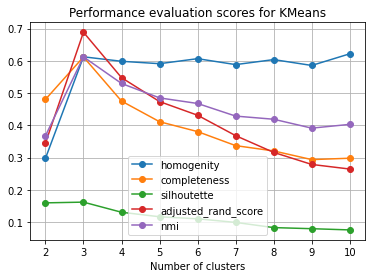

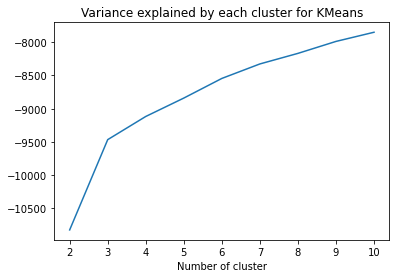

In [619]:
array_homo =[]
array_comp = []
array_sil = []
array_var = []
array_accuracy=[]
array_adj=[]
array_nmi=[]
cost =[]

component_list = range(2, 11,1)
for num_classes in component_list:

    clf = KMeans(n_clusters= num_classes, init='k-means++',n_init=50, max_iter=300, random_state=20)
    
    clf.fit(X_train)
    y_test_pred = clf.predict(X_test)
    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_test, y_test_pred)
    array_homo.append(homo)
    
    #Completeness score
    comp = metrics.completeness_score(y_test, y_test_pred)
    array_comp.append(comp)
    
    acc_score=metrics.accuracy_score(y_test, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)
    nmi_score=normalized_mutual_info_score(y_test, y_test_pred)
    array_nmi.append(nmi_score)
    
    #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(y_test, y_test_pred)
    array_adj.append(adj_score)
    
    #Silhoutette score
    sil = metrics.silhouette_score(X_test, y_test_pred, metric='euclidean')
    array_sil.append(sil)

    #Variance explained by the cluster
    var = clf.score(X_test)
    array_var.append(var)
    
    cost.append(clf.inertia_) 
    
    

#Generating plots
fig4,ax4 = plt.subplots()
ax4.plot(component_list, array_homo,"-o")
ax4.plot(component_list, array_comp,"-o")
ax4.plot(component_list, array_sil,"-o")
ax4.plot(component_list, array_adj,"-o")
ax4.plot(component_list, array_nmi,"-o")
#ax4.plot(component_list, array_accuracy,"-o")
plt.grid(True)
plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for KMeans')


fig5, ax5 = plt.subplots()
ax5.plot(component_list, array_var)
plt.title('Variance explained by each cluster for KMeans')
plt.xlabel('Number of cluster')

plt.show()



In [306]:
kmeans = KMeans(n_clusters= 3, init='k-means++',n_init=50, max_iter=300, random_state=20)
start = timer()
X_kmeans=kmeans.fit_transform(X_train)
end = timer()
print("Time for fit: ", end - start)

Time for fit:  0.34041429999342654


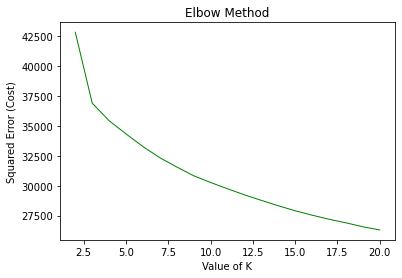

In [307]:
plt.plot(range(2, 21), cost, color ='g', linewidth ='1')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.title("Elbow Method")
plt.show()

In [631]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size = 0.2)

0.051
0.051
0.361
0.361
0.291
0.291
0.299
0.299
0.238
0.238
0.119
0.119
0.094
0.094
0.092
0.092
0.073
0.073


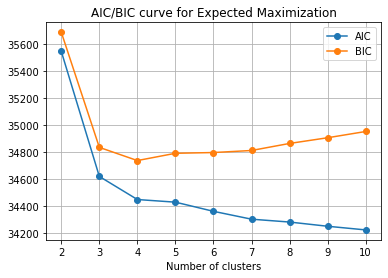

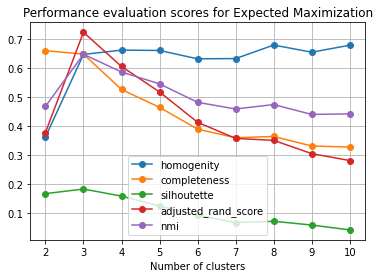

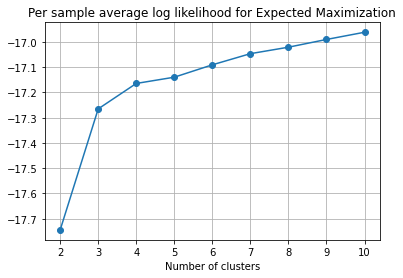

In [632]:
array_aic = []
array_bic = []
array_homo =[]
array_comp = []
array_sil = []
array_avg_log = []
array_accuracy=[]
array_adj=[]
array_nmi=[]

component_list = range(2, 11,1)
for num_classes in component_list:

    clf = GaussianMixture(n_components=num_classes,covariance_type='spherical', random_state=20,max_iter=300, init_params= 'kmeans')
    #clf = KMeans(n_clusters= num_classes, init='k-means++')
    clf.fit(X_train)

    y_test_pred = clf.predict(X_test)
    #Per sample average log likelihood
    avg_log = clf.score(X_test)
    array_avg_log.append(avg_log)

    #AIC on the test data
    aic = clf.aic(X_test)
    array_aic.append(aic)

    #BIC on the test data
    bic = clf.bic(X_test)
    array_bic.append(bic)
    
    acc_score=metrics.accuracy_score(y_test, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)

    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_test, y_test_pred)
    array_homo.append(homo)

    #Completeness score
    comp = metrics.completeness_score(y_test, y_test_pred)
    array_comp.append(comp)
    
    print(acc_score)
    nmi_score=normalized_mutual_info_score(y_test, y_test_pred)
    array_nmi.append(nmi_score)
    
    #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(y_test, y_test_pred)
    array_adj.append(adj_score)

    #Silhoutette score
    sil = metrics.silhouette_score(X_test, y_test_pred, metric='euclidean')
    array_sil.append(sil)

#Generating plots

fig1,ax1 = plt.subplots()
ax1.plot(component_list, array_aic,"-o")
ax1.plot(component_list, array_bic,"-o")
plt.legend(['AIC', 'BIC'])
plt.xlabel('Number of clusters')
plt.title('AIC/BIC curve for Expected Maximization')
plt.grid(True)
fig2,ax2 = plt.subplots()
ax2.plot(component_list, array_homo,"-o")
ax2.plot(component_list, array_comp,"-o")
ax2.plot(component_list, array_sil,"-o")
ax2.plot(component_list, array_adj,"-o")
ax2.plot(component_list, array_nmi,"-o")
plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for Expected Maximization')
plt.grid(True)

fig3, ax3 = plt.subplots()
ax3.plot(component_list, array_avg_log,"-o")
plt.xlabel('Number of clusters')
plt.title('Per sample average log likelihood for Expected Maximization')
plt.grid(True)

plt.show()

In [620]:
em = GaussianMixture(n_components=3,covariance_type='spherical', max_iter=300, init_params= 'kmeans')
    #clf = KMeans(n_clusters= num_classes, init='k-means++')
start = timer()
X_em = em.fit(X_train)
end = timer()
print("Time for fit: ", end - start)

Time for fit:  0.019375899981241673


In [591]:
# Global cluster setting
nclusters = 3

#data = clean_dataset(data)
#data.replace([np.inf, -np.inf], np.nan, inplace=True)
X = data.drop(['quality'], axis=1)
#y = data.iloc[:,11]
scaler = preprocessing.StandardScaler()

X1 = scaler.fit_transform(X)
Y1=data['quality']
#X1=clean_dataset(X1)
#X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size = 0.2)

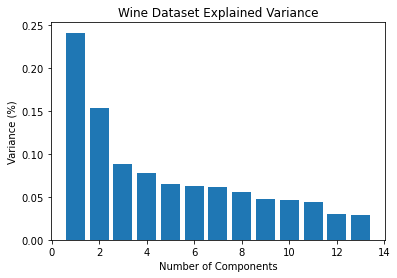

In [368]:
pca = PCA(n_components=13)
pca.fit(X1)
x=range(1,14,1)
plt.figure()
plt.bar(x,pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Wine Dataset Explained Variance')
plt.show()


In [489]:
pca = PCA(n_components=13)
pca.fit(X1)
n_samples = X1.shape[0]
# We center the data and compute the sample covariance matrix.
X1 -= np.mean(X, axis=0)
cov_matrix = np.dot(X1.T, X1) / n_samples
for eigenvector in pca.components_:
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))

78594.23085598707
111820.36218396497
2266.9708090213408
20670.329824729197
742.5530963100275
1805.2206903707422
56.445049116784574
3560.721491301103
2610.330027045813
414.87823428300527
2343.931137819393
17814.493301806433
322215.4820324323


In [624]:
# Set dimensions
ndimensions = 8
random_state=10
pca = PCA(n_components=ndimensions, random_state=1)

start = timer()
X_pca_array=pca.fit_transform(X1)
end = timer()
print("Time for fit: ", end - start)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']) # PC=principal component
#X_pca.head()
sum(pca.explained_variance_ratio_)


Time for fit:  0.01244409999344498


0.8046689525637704

0.0192
0.6494
0.4414
0.2974
0.032
0.0676
0.4104
0.121
0.0146
0.0806
0.0066
0.0098
0.0748
0.006
0.011
0.095
0.114
0.0564
0.0024


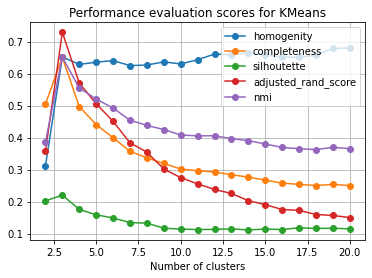

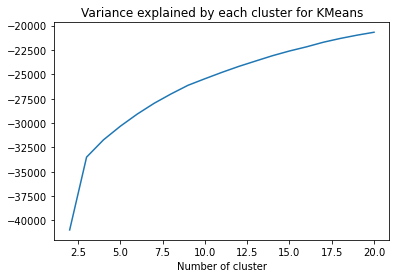

In [625]:
array_homo =[]
array_comp = []
array_sil = []
array_var = []
array_accuracy=[]
array_adj=[]
array_nmi=[]
cost =[]
y_test=Y1
component_list = range(2, 21,1)
for num_classes in component_list:

    clf = KMeans(n_clusters= num_classes, init='k-means++',n_init=50, max_iter=300, random_state=20)
    
    clf.fit(X_pca)
    y_test_pred = clf.predict(X_pca)
    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_test, y_test_pred)
    array_homo.append(homo)
    
    #Completeness score
    comp = metrics.completeness_score(y_test, y_test_pred)
    array_comp.append(comp)
    
    acc_score=metrics.accuracy_score(y_test, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)
    nmi_score=normalized_mutual_info_score(y_test, y_test_pred)
    array_nmi.append(nmi_score)
    
    #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(y_test, y_test_pred)
    array_adj.append(adj_score)
    
    #Silhoutette score
    sil = metrics.silhouette_score(X_pca, y_test_pred, metric='euclidean')
    array_sil.append(sil)

    #Variance explained by the cluster
    var = clf.score(X_pca)
    array_var.append(var)
    
    cost.append(clf.inertia_) 
    
    

#Generating plots
fig4,ax4 = plt.subplots()
ax4.plot(component_list, array_homo,"-o")
ax4.plot(component_list, array_comp,"-o")
ax4.plot(component_list, array_sil,"-o")
ax4.plot(component_list, array_adj,"-o")
ax4.plot(component_list, array_nmi,"-o")
#ax4.plot(component_list, array_accuracy,"-o")
plt.grid(True)
plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for KMeans')


fig5, ax5 = plt.subplots()
ax5.plot(component_list, array_var)
plt.title('Variance explained by each cluster for KMeans')
plt.xlabel('Number of cluster')

plt.show()


0.2688
0.6502
0.4026
0.0224
0.0286
0.1332
0.2646
0.2174
0.015
0.0102
0.1468
0.1664
0.0268
0.1124
0.0136
0.1416
0.0254
0.1348
0.0542


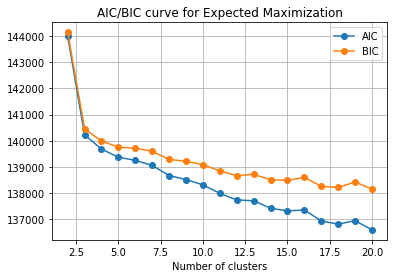

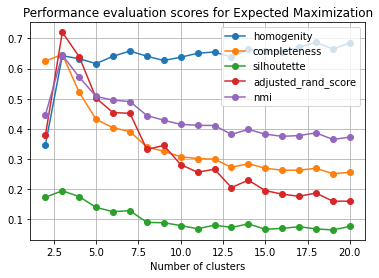

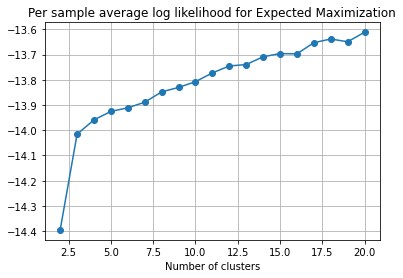

In [322]:
array_aic = []
array_bic = []
array_homo =[]
array_comp = []
array_sil = []
array_avg_log = []
array_accuracy=[]
array_adj=[]
array_nmi=[]
y_train=Y1
component_list = range(2, 21,1)
for num_classes in component_list:

    clf = GaussianMixture(n_components=num_classes,covariance_type='spherical', max_iter=300, init_params= 'kmeans')
    #clf = KMeans(n_clusters= num_classes, init='k-means++')
    clf.fit(X_pca)

    y_test_pred = clf.predict(X_pca)
    #Per sample average log likelihood
    avg_log = clf.score(X_pca)
    array_avg_log.append(avg_log)

    #AIC on the test data
    aic = clf.aic(X_pca)
    array_aic.append(aic)

    #BIC on the test data
    bic = clf.bic(X_pca)
    array_bic.append(bic)
    
    acc_score=metrics.accuracy_score(y_train, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)

    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_train, y_test_pred)
    array_homo.append(homo)

    #Completeness score
    comp = metrics.completeness_score(y_train, y_test_pred)
    array_comp.append(comp)
    
    #print(acc_score)
    nmi_score=normalized_mutual_info_score(y_train, y_test_pred)
    array_nmi.append(nmi_score)
    
    #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(y_train, y_test_pred)
    array_adj.append(adj_score)

    #Silhoutette score
    sil = metrics.silhouette_score(X_pca, y_test_pred, metric='euclidean')
    array_sil.append(sil)

#Generating plots

fig1,ax1 = plt.subplots()
ax1.plot(component_list, array_aic,"-o")
ax1.plot(component_list, array_bic,"-o")
plt.legend(['AIC', 'BIC'])
plt.xlabel('Number of clusters')
plt.title('AIC/BIC curve for Expected Maximization')
plt.grid(True)
fig2,ax2 = plt.subplots()
ax2.plot(component_list, array_homo,"-o")
ax2.plot(component_list, array_comp,"-o")
ax2.plot(component_list, array_sil,"-o")
ax2.plot(component_list, array_adj,"-o")
ax2.plot(component_list, array_nmi,"-o")
plt.grid(True)
plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for Expected Maximization')


fig3, ax3 = plt.subplots()
ax3.plot(component_list, array_avg_log,"-o")
plt.xlabel('Number of clusters')
plt.title('Per sample average log likelihood for Expected Maximization')
plt.grid(True)

plt.show()

In [593]:
# Compare Kmeans and EM

# at this point, if you don't have labelled data,
# you can add the k-means cluster ids to this table and make a
# colored scatterplot.

kmeans = KMeans(n_clusters=3, random_state=random_state)
start = timer()
kmeans.fit(X_pca)
end = timer()
print("Time for fit: ", end - start)

y_cluster_kmeans = kmeans.predict(X_pca)

y_id_array = data['quality'] # convert to nums

df_plotKM = X_pca.copy()
df_plotKM['ClusterKmeans'] = y_cluster_kmeans  #kmeans cluster
df_plotKM['target'] = y_id_array # also add actual labels so we can use it in later plots
#df_plotKM.sample(5)

Time for fit:  0.0595618000079412


In [594]:
gmm = GaussianMixture(n_components=3, random_state=random_state)
start = timer()
gmm.fit(X_pca)
end = timer()
print("Time for fit: ", end - start)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_pca)

df_plotEM = X_pca.copy()
df_plotEM['ClusterEM'] = y_cluster_gmm  #kmeans cluster
df_plotEM['target'] = y_id_array # also add actual labels so we can use it in later plots
#df_plotEM.sample(5)

Time for fit:  0.14525890001095831


In [325]:
score1 = metrics.adjusted_rand_score(y_train, y_cluster_kmeans)
score2 = metrics.adjusted_rand_score(y_train, y_cluster_gmm)
score3 = metrics.homogeneity_score(y_train, y_cluster_kmeans)
score4 = metrics.homogeneity_score(y_train, y_cluster_gmm)
score5 = metrics.normalized_mutual_info_score(y_train, y_cluster_kmeans)
score6 = metrics.normalized_mutual_info_score(y_train, y_cluster_gmm)
print('Goodness of clustering with KM after PCA: ', score1)
print('Goodness of clustering with EM after PCA: ', score2)
print('Homogeneity of clustering with KM after PCA: ', score3)
print('Homogeneity of clustering with EM after PCA: ', score4)
print('NMI of clustering with KM after PCA: ', score5)
print('NMI of clustering with EM after PCA: ', score6)

Goodness of clustering with KM after PCA:  0.7308851769007819
Goodness of clustering with EM after PCA:  0.39763834634896567
Homogeneity of clustering with KM after PCA:  0.6540135530550079
Homogeneity of clustering with EM after PCA:  0.4472832740010685
NMI of clustering with KM after PCA:  0.6535380290299113
NMI of clustering with EM after PCA:  0.45496426391535555


In [597]:
def plotData(df, groupby, x, y, title):

    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('viridis',3)

    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.htPP
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = x, y = y,
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i),
                     alpha=0.3,
                     s=20) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title(title);

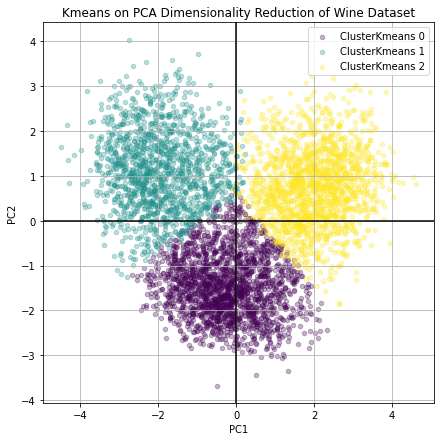

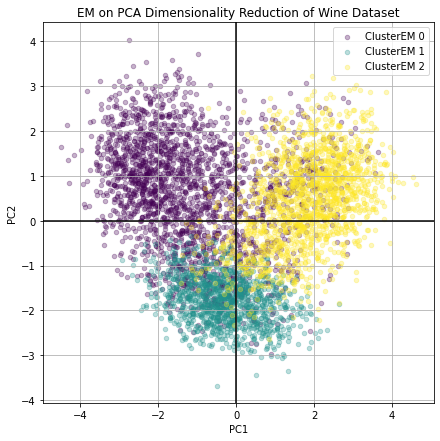

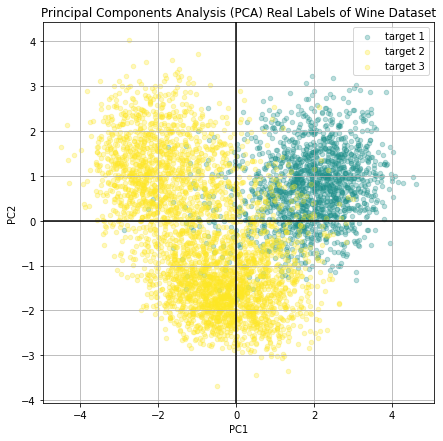

In [598]:
# PCA reduced Predicted Labels
plotData(df_plotKM, 'ClusterKmeans', 'PC1', 'PC2', 
         'Kmeans on PCA Dimensionality Reduction of Wine Dataset')
plotData(df_plotEM, 'ClusterEM', 'PC1', 'PC2', 
         'EM on PCA Dimensionality Reduction of Wine Dataset')
plotData(df_plotKM, 'target', 'PC1', 'PC2', 
         'Principal Components Analysis (PCA) Real Labels of Wine Dataset')

4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000


D:\python\anaconda\envs\ML\lib\site-packages\sklearn\decomposition\_fastica.py:470: UserWarning: n_components is too large: it will be set to 3
  % n_components
D:\python\anaconda\envs\ML\lib\site-packages\sklearn\decomposition\_fastica.py:470: UserWarning: n_components is too large: it will be set to 3
  % n_components
D:\python\anaconda\envs\ML\lib\site-packages\sklearn\decomposition\_fastica.py:470: UserWarning: n_components is too large: it will be set to 3
  % n_components
D:\python\anaconda\envs\ML\lib\site-packages\sklearn\decomposition\_fastica.py:470: UserWarning: n_components is too large: it will be set to 3
  % n_components
D:\python\anaconda\envs\ML\lib\site-packages\sklearn\decomposition\_fastica.py:470: UserWarning: n_components is too large: it will be set to 3
  % n_components
D:\python\anaconda\envs\ML\lib\site-packages\sklearn\decomposition\_fastica.py:470: UserWarning: n_components is too large: it will be set to 3
  % n_components
D:\python\anaconda\envs\ML\lib\sit

Text(0, 0.5, 'Kurtosis')

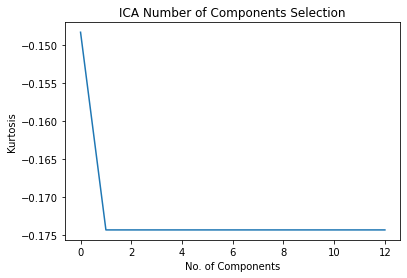

In [599]:
kurt = []

for component in range(2,15):  
    ica = FastICA(n_components=component, random_state=random_state)
    ica.fit(X_train)
    X_ica_array = ica.transform(X_train)
    kurt.append(np.average(np.apply_along_axis(kurtosis, 0, X_ica_array)))

plt.plot(kurt)
plt.title('ICA Number of Components Selection')
plt.xlabel('No. of Components')
plt.ylabel('Kurtosis')

#### ICA

In [397]:
# Global cluster setting
nclusters = 3

#data = clean_dataset(data)
#data.replace([np.inf, -np.inf], np.nan, inplace=True)
X = data.drop(['quality'], axis=1)
#y = data.iloc[:,11]
scaler = preprocessing.StandardScaler()

X1 = scaler.fit_transform(X)
Y1=data['quality']
#X1=clean_dataset(X1)
#X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size = 0.2)

In [415]:
import scipy
def _calculate(X, ica_, n_components):
    
    components = ica_.components_
    ica_.components_ = components[:n_components]

    transformed = ica_.transform(X)
    ica_.components_ = components
 
    kurtosis = scipy.stats.kurtosis(transformed)

    return kurtosis


shape 13
k values [ 0.75733839 -1.0253384   0.44196354 -0.59588767 -0.82031177  0.95930662
  1.45204034  0.27255721  1.02315765  0.15448216  1.49821433  0.45093507
  0.52143847]


Text(0, 0.5, 'kurtosis')

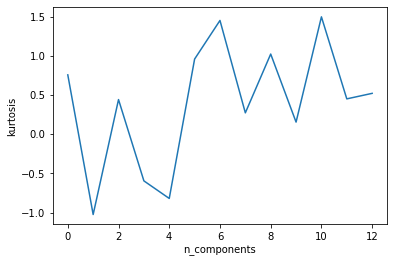

In [477]:
ica = FastICA(random_state=1)
ica.fit(X1)

fig, ax = plt.subplots()
#ax.line(np.arange(X_train.shape[1]), _calculate(X_train,ica, X_train.shape[1]) , linewidth=2, color = 'blue')
print("shape",X1.shape[1])
print("k values",_calculate(X1,ica, X1.shape[1]))
plt.plot(np.arange(X1.shape[1]), _calculate(X1,ica, X1.shape[1]))
plt.axis('tight')
plt.xlabel('n_components')
ax.set_ylabel('kurtosis')

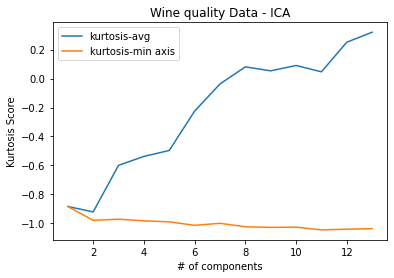

In [492]:
    maxc = X1.shape[1]
    l = 14
    ks = range(1,l)
    kur = np.zeros(maxc)
    scr = np.zeros(maxc)
    ss = np.zeros(l-1)
    ll = np.zeros(l-1)

    for i in ks:
        ica = FastICA(n_components = i,random_state=10, whiten='true')
        Z = ica.fit_transform(X1)
        kur[i-1] = np.average(scipy.stats.kurtosis(Z))
        scr[i-1] = np.amin(scipy.stats.kurtosis(Z))



    plt.plot(ks,kur,ks,scr)
    plt.title("Wine quality Data - ICA")
    plt.xlabel("# of components")
    plt.ylabel("Kurtosis Score")
    plt.legend(["kurtosis-avg",'kurtosis-min axis'])
    plt.show()

In [626]:
X_train=X1
y_train=Y1
ica = FastICA(n_components=12, random_state=10)

start = timer()
ica.fit(X_train)
end = timer()
print("Time for fit: ", end - start)

X_ica_array = ica.transform(X_train)
X_ica = pd.DataFrame(X_ica_array, columns=['ICA1','ICA2','ICA3','ICA4','ICA5','IC6','ICA7','ICA8','ICA9','IC10','IC11','IC12'])
X_ica.sample(5)

Time for fit:  0.03560480001033284


,ICA1,ICA2,ICA3,ICA4,ICA5,IC6,ICA7,ICA8,ICA9,IC10,IC11,IC12
4608,-0.012049,-0.004210,-0.008618,-0.000528,0.023615,-0.009622,0.000461,-0.021722,-0.001287,-0.008975,-0.012636,-0.007841
4683,-0.006353,0.007258,-0.006495,-0.018370,-0.015317,0.001278,0.000923,0.005085,0.017156,-0.010020,-0.004999,0.019769
731,0.019490,-0.009965,-0.009348,-0.004341,-0.006464,0.001770,-0.016359,0.016055,-0.001079,0.015765,-0.018732,-0.001868
1263,-0.027938,-0.004980,0.011244,0.010337,0.025482,0.002809,0.029342,0.014148,0.001574,-0.006083,-0.023105,0.053872
156,-0.004017,0.011534,-0.012290,-0.009450,-0.012871,0.000183,-0.004495,-0.018846,-0.011256,0.032005,-0.011647,0.000977


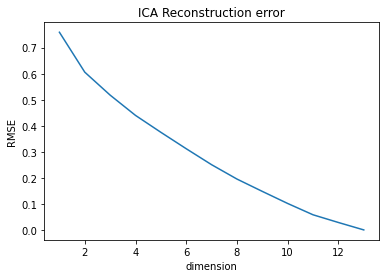

In [479]:

rc_errors_wine = {}
dims_wine = list(range(1,14,1))
for dim in dims_wine:
    grp = FastICA(n_components=dim, random_state=10)
    x_prime = grp.fit_transform(X_train)
    
    # reconstruction
    A = np.linalg.pinv(grp.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = metrics.mean_squared_error(X_train, reconstructed)    
    rc_errors_wine[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors_wine.keys()), list(rc_errors_wine.values()))
plt.xlabel("dimension")
plt.ylabel("RMSE")
plt.title("ICA Reconstruction error")
plt.show()

In [480]:
kmeans = KMeans(n_clusters=3, random_state=10)
start = timer()
kmeans.fit(X_ica)
end = timer()
print("Time for fit: ", end - start)
y_cluster_kmeans = kmeans.predict(X_ica)

y_id_array = data['quality'] # convert to nums

df_plotKM = X_ica.copy()
df_plotKM['ClusterKmeans'] = y_cluster_kmeans  #kmeans cluster
df_plotKM['target'] = y_id_array

Time for fit:  0.1592534999945201


In [481]:
gmm = GaussianMixture(n_components=3, random_state=10)
start = timer()
gmm.fit(X_ica)
end = timer()
print("Time for fit: ", end - start)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_ica)

df_plotEM = X_ica.copy()
df_plotEM['ClusterEM'] = y_cluster_gmm  #kmeans cluster
df_plotEM['target'] = y_id_array # also add actual labels so we can use it in later plots
#df_plotEM.sample(5)

Time for fit:  0.058207099995343015


0.2992
0.033
0.0556
0.5276
0.05
0.0346
0.07
0.0644
0.1252
0.0678
0.045
0.0724
0.04
0.0648
0.0742
0.0308
0.0704
0.0728
0.0416


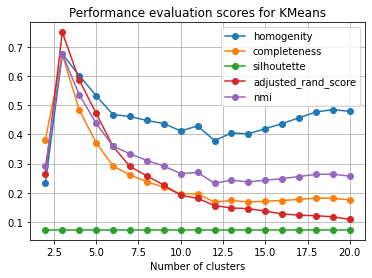

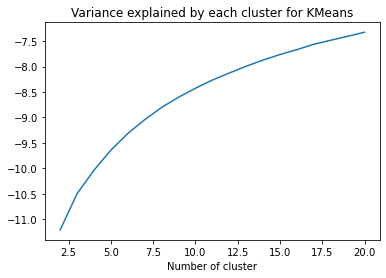

In [627]:
array_homo =[]
array_comp = []
array_sil = []
array_var = []
array_accuracy=[]
array_adj=[]
array_nmi=[]
cost =[]

component_list = range(2, 21,1)
for num_classes in component_list:

    clf = KMeans(n_clusters= num_classes, init='k-means++',n_init=50, max_iter=300, random_state=20)
    
    clf.fit(X_ica)
    y_test_pred = clf.predict(X_ica)
    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_train, y_test_pred)
    array_homo.append(homo)
    
    #Completeness score
    comp = metrics.completeness_score(y_train, y_test_pred)
    array_comp.append(comp)
    
    acc_score=metrics.accuracy_score(y_train, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)
    nmi_score=normalized_mutual_info_score(y_train, y_test_pred)
    array_nmi.append(nmi_score)
    
    #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(y_train, y_test_pred)
    array_adj.append(adj_score)
    
    #Silhoutette score
    sil = metrics.silhouette_score(X_ica, y_train, metric='euclidean')
    array_sil.append(sil)

    #Variance explained by the cluster
    var = clf.score(X_ica)
    array_var.append(var)
    
    cost.append(clf.inertia_) 
    
    

#Generating plots
fig4,ax4 = plt.subplots()
ax4.plot(component_list, array_homo,"-o")
ax4.plot(component_list, array_comp,"-o")
ax4.plot(component_list, array_sil,"-o")
ax4.plot(component_list, array_adj,"-o")
ax4.plot(component_list, array_nmi,"-o")
#ax4.plot(component_list, array_accuracy,"-o")
plt.grid(True)
plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for KMeans')


fig5, ax5 = plt.subplots()
ax5.plot(component_list, array_var)
plt.title('Variance explained by each cluster for KMeans')
plt.xlabel('Number of cluster')

plt.show()



0.0004
0.0566
0.464
0.418
0.1752
0.1602
0.1474
0.15
0.0214
0.2064
0.0424
0.0104
0.0174
0.148
0.0312
0.1328
0.009
0.0366
0.1252


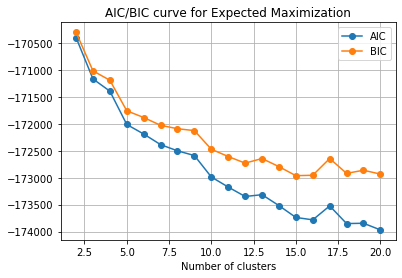

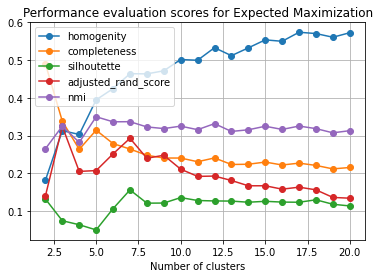

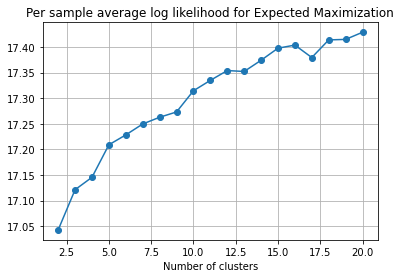

In [483]:
array_aic = []
array_bic = []
array_homo =[]
array_comp = []
array_sil = []
array_avg_log = []
array_accuracy=[]
array_adj=[]
array_nmi=[]

component_list = range(2, 21,1)
for num_classes in component_list:

    clf = GaussianMixture(n_components=num_classes,covariance_type='spherical', max_iter=300, init_params= 'kmeans')
    #clf = KMeans(n_clusters= num_classes, init='k-means++')
    clf.fit(X_ica)

    y_test_pred = clf.predict(X_ica)
    #Per sample average log likelihood
    avg_log = clf.score(X_ica)
    array_avg_log.append(avg_log)

    #AIC on the test data
    aic = clf.aic(X_ica)
    array_aic.append(aic)

    #BIC on the test data
    bic = clf.bic(X_ica)
    array_bic.append(bic)
    
    acc_score=metrics.accuracy_score(y_train, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)

    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_train, y_test_pred)
    array_homo.append(homo)

    #Completeness score
    comp = metrics.completeness_score(y_train, y_test_pred)
    array_comp.append(comp)
    
    #print(acc_score)
    nmi_score=normalized_mutual_info_score(y_train, y_test_pred)
    array_nmi.append(nmi_score)
    
    #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(y_train, y_test_pred)
    array_adj.append(adj_score)

    #Silhoutette score
    sil = metrics.silhouette_score(X_ica, y_test_pred, metric='euclidean')
    array_sil.append(sil)

#Generating plots

fig1,ax1 = plt.subplots()
ax1.plot(component_list, array_aic,"-o")
ax1.plot(component_list, array_bic,"-o")
plt.legend(['AIC', 'BIC'])
plt.xlabel('Number of clusters')
plt.title('AIC/BIC curve for Expected Maximization')
plt.grid(True)
fig2,ax2 = plt.subplots()
ax2.plot(component_list, array_homo,"-o")
ax2.plot(component_list, array_comp,"-o")
ax2.plot(component_list, array_sil,"-o")
ax2.plot(component_list, array_adj,"-o")
ax2.plot(component_list, array_nmi,"-o")
plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for Expected Maximization')
plt.grid(True)

fig3, ax3 = plt.subplots()
ax3.plot(component_list, array_avg_log,"-o")
plt.xlabel('Number of clusters')
plt.title('Per sample average log likelihood for Expected Maximization')
plt.grid(True)

plt.show()

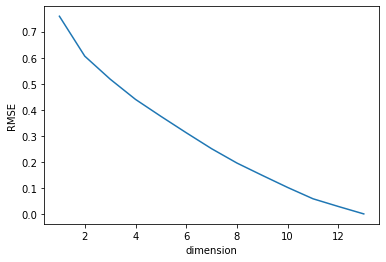

In [484]:
rc_errors_wine = {}
dims_wine = list(range(1,14,1))
for dim in dims_wine:
    grp = FastICA(n_components=dim, random_state=10)
    x_prime = grp.fit_transform(X_train)
    
    # reconstruction
    A = np.linalg.pinv(grp.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = metrics.mean_squared_error(X_train, reconstructed)    
    rc_errors_wine[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors_wine.keys()), list(rc_errors_wine.values()))
plt.xlabel("dimension")
plt.ylabel("RMSE")
plt.show()

In [485]:
score1 = metrics.adjusted_rand_score(y_train, y_cluster_kmeans)
score2 = metrics.adjusted_rand_score(y_train, y_cluster_gmm)
score3 = metrics.homogeneity_score(y_train, y_cluster_kmeans)
score4 = metrics.homogeneity_score(y_train, y_cluster_gmm)
score5 = normalized_mutual_info_score(y_train, y_cluster_kmeans)
score6 = normalized_mutual_info_score(y_train, y_cluster_gmm)
print('Goodness of clustering with KM after ICA: ', score1)
print('Goodness of clustering with EM after ICA: ', score2)
print('Homogeneity of clustering with KM after ICA: ', score3)
print('Homogeneity of clustering with EM after ICA: ', score4)
print('NMI of clustering with KM after ICA: ', score5)
print('NMI of clustering with EM after ICA: ', score6)

Goodness of clustering with KM after ICA:  0.7556785056020768
Goodness of clustering with EM after ICA:  0.6672121059921765
Homogeneity of clustering with KM after ICA:  0.6787078812134621
Homogeneity of clustering with EM after ICA:  0.6177914113983979
NMI of clustering with KM after ICA:  0.6782666892807826
NMI of clustering with EM after ICA:  0.615239510686859


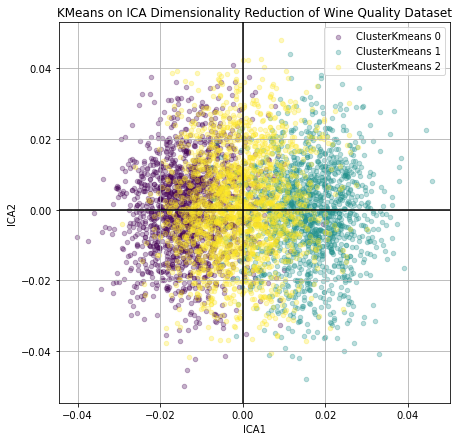

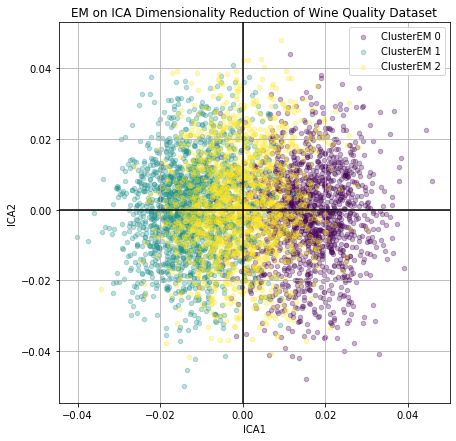

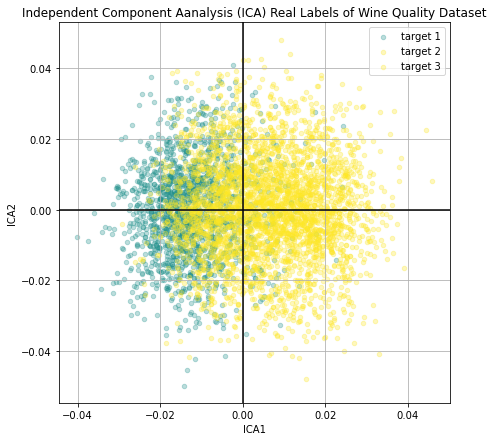

In [486]:
plotData(df_plotKM, 'ClusterKmeans', 'ICA1', 'ICA2',
         'KMeans on ICA Dimensionality Reduction of Wine Quality Dataset')
plotData(df_plotEM, 'ClusterEM', 'ICA1', 'ICA2',
         'EM on ICA Dimensionality Reduction of Wine Quality Dataset')
plotData(df_plotKM, 'target', 'ICA1', 'ICA2',
         'Independent Component Aanalysis (ICA) Real Labels of Wine Quality Dataset')

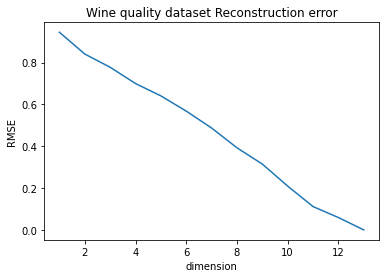

In [672]:
from sklearn.random_projection import GaussianRandomProjection
rc_errors_wine = {}
dims_wine = list(range(1,14,1))
for dim in dims_wine:
    grp = GaussianRandomProjection(n_components=dim, random_state=10)
    x_prime = grp.fit_transform(X_train)
    
    # reconstruction
    A = np.linalg.pinv(grp.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = metrics.mean_squared_error(X_train, reconstructed)    
    rc_errors_wine[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors_wine.keys()), list(rc_errors_wine.values()))
plt.xlabel("dimension")
plt.ylabel("RMSE")
plt.title("Wine quality dataset Reconstruction error")
plt.show()

In [628]:
#n_components=8
X_train=X1
Y_train=Y1
rp = GaussianRandomProjection(n_components=8, random_state=10)

start = timer()
rp.fit(X_train)
end = timer()
print("Time for fit: ", end - start)

X_rp_array = rp.transform(X_train)
X_rp = pd.DataFrame(X_rp_array, columns=['RP1','RP2','RP3','RP4','RP5','RP6','RP7','RP8'])
X_rp.sample(5)

Time for fit:  0.00088900001719594


,RP1,RP2,RP3,RP4,RP5,RP6,RP7,RP8
3182,0.448853,-0.584158,-0.063803,0.468479,-1.192601,1.619049,-1.065165,-0.601499
1153,-0.259207,-2.163827,0.779484,-0.711811,-0.057465,1.356811,1.997453,-2.159669
2322,-0.448974,-0.508458,0.103236,-0.149157,-0.492648,1.663035,3.353945,0.251815
716,0.302427,-1.358127,1.046672,1.184008,-0.933819,0.828091,0.333464,-1.468432
3409,-1.060796,-1.259589,-0.050305,0.405714,1.419618,-0.343763,1.179845,-0.187755


In [502]:
array_homo =[]
array_comp = []
array_sil = []
array_var = []
array_accuracy=[]
array_adj=[]
array_nmi=[]
cost =[]

component_list = range(2, 8,1)
for num_classes in component_list:

    clf = KMeans(n_clusters= num_classes, init='k-means++',n_init=50, max_iter=300, random_state=20)
    
    clf.fit(X_rp)
    y_test_pred = clf.predict(X_rp)
    
    acc_score=metrics.accuracy_score(y_train, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)


0.2926
0.4394
0.125
0.2226
0.2342
0.0508


In [508]:
kmeans = KMeans(n_clusters=3, random_state=10)
start = timer()
kmeans.fit(X_rp)
end = timer()
print("Time for fit: ", end - start)
y_cluster_kmeans = kmeans.predict(X_rp)

y_id_array = data['quality'] # convert to nums

df_plotKM = X_rp.copy()
df_plotKM['ClusterKmeans'] = y_cluster_kmeans  #kmeans cluster
df_plotKM['target'] = y_id_array

Time for fit:  0.1340621999988798


In [509]:
gmm = GaussianMixture(n_components=3, random_state=10)
start = timer()
gmm.fit(X_rp)
end = timer()
print("Time for fit: ", end - start)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_rp)

df_plotEM = X_rp.copy()
df_plotEM['ClusterEM'] = y_cluster_gmm  #kmeans cluster
df_plotEM['target'] = y_id_array # also add actual labels so we can use it in later plots
#df_plotEM.sample(5)

Time for fit:  0.0934220000053756


0.2926
0.4394
0.125
0.2226
0.2342
0.0508
0.1722
0.057
0.087
0.2282
0.0284
0.1312
0.0596
0.0562
0.0238
0.0836
0.1248
0.0224
0.024


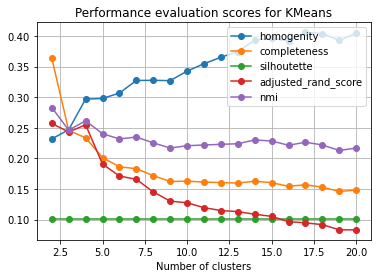

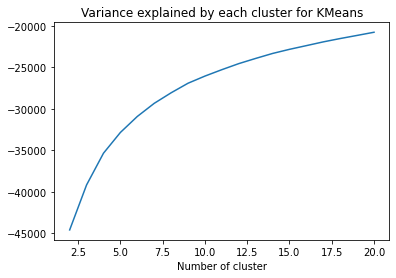

In [511]:
array_homo =[]
array_comp = []
array_sil = []
array_var = []
array_accuracy=[]
array_adj=[]
array_nmi=[]
cost =[]

component_list = range(2, 21,1)
for num_classes in component_list:

    clf = KMeans(n_clusters= num_classes, init='k-means++',n_init=50, max_iter=300, random_state=20)
    
    clf.fit(X_rp)
    y_test_pred = clf.predict(X_rp)
    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_train, y_test_pred)
    array_homo.append(homo)
    
    #Completeness score
    comp = metrics.completeness_score(y_train, y_test_pred)
    array_comp.append(comp)
    
    acc_score=metrics.accuracy_score(y_train, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)
    nmi_score=normalized_mutual_info_score(y_train, y_test_pred)
    array_nmi.append(nmi_score)
    
    #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(y_train, y_test_pred)
    array_adj.append(adj_score)
    
    #Silhoutette score
    sil = metrics.silhouette_score(X_rp, y_train, metric='euclidean')
    array_sil.append(sil)

    #Variance explained by the cluster
    var = clf.score(X_rp)
    array_var.append(var)
    
    cost.append(clf.inertia_) 
    
    

#Generating plots
fig4,ax4 = plt.subplots()
ax4.plot(component_list, array_homo,"-o")
ax4.plot(component_list, array_comp,"-o")
ax4.plot(component_list, array_sil,"-o")
ax4.plot(component_list, array_adj,"-o")
ax4.plot(component_list, array_nmi,"-o")
#ax4.plot(component_list, array_accuracy,"-o")
plt.grid(True)
plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for KMeans')


fig5, ax5 = plt.subplots()
ax5.plot(component_list, array_var)
plt.title('Variance explained by each cluster for KMeans')
plt.xlabel('Number of cluster')

plt.show()



0.2948
0.1566
0.1318
0.171
0.2796
0.0846
0.0848
0.2726
0.085
0.1186
0.048
0.0162
0.0986
0.0886
0.0764
0.0528
0.184
0.0492
0.0338


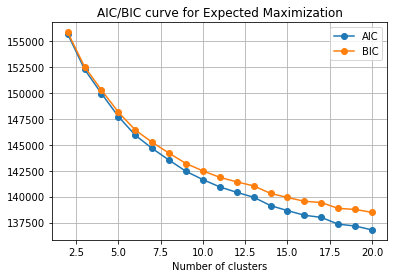

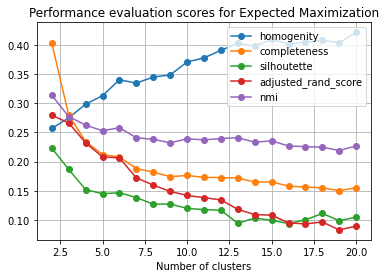

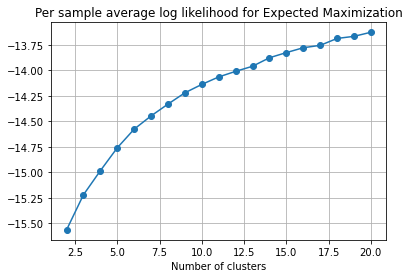

In [345]:
array_aic = []
array_bic = []
array_homo =[]
array_comp = []
array_sil = []
array_avg_log = []
array_accuracy=[]
array_adj=[]
array_nmi=[]

component_list = range(2, 21,1)
for num_classes in component_list:

    clf = GaussianMixture(n_components=num_classes,covariance_type='spherical', max_iter=300, init_params= 'kmeans')
    #clf = KMeans(n_clusters= num_classes, init='k-means++')
    clf.fit(X_rp)

    y_test_pred = clf.predict(X_rp)
    #Per sample average log likelihood
    avg_log = clf.score(X_rp)
    array_avg_log.append(avg_log)

    #AIC on the test data
    aic = clf.aic(X_rp)
    array_aic.append(aic)

    #BIC on the test data
    bic = clf.bic(X_rp)
    array_bic.append(bic)
    
    acc_score=metrics.accuracy_score(y_train, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)

    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_train, y_test_pred)
    array_homo.append(homo)

    #Completeness score
    comp = metrics.completeness_score(y_train, y_test_pred)
    array_comp.append(comp)
    
    #print(acc_score)
    nmi_score=normalized_mutual_info_score(y_train, y_test_pred)
    array_nmi.append(nmi_score)
    
    #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(y_train, y_test_pred)
    array_adj.append(adj_score)

    #Silhoutette score
    sil = metrics.silhouette_score(X_rp, y_test_pred, metric='euclidean')
    array_sil.append(sil)

#Generating plots

fig1,ax1 = plt.subplots()
ax1.plot(component_list, array_aic,"-o")
ax1.plot(component_list, array_bic,"-o")
plt.legend(['AIC', 'BIC'])
plt.xlabel('Number of clusters')
plt.title('AIC/BIC curve for Expected Maximization')
plt.grid(True)
fig2,ax2 = plt.subplots()
ax2.plot(component_list, array_homo,"-o")
ax2.plot(component_list, array_comp,"-o")
ax2.plot(component_list, array_sil,"-o")
ax2.plot(component_list, array_adj,"-o")
ax2.plot(component_list, array_nmi,"-o")
plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for Expected Maximization')
plt.grid(True)

fig3, ax3 = plt.subplots()
ax3.plot(component_list, array_avg_log,"-o")
plt.xlabel('Number of clusters')
plt.title('Per sample average log likelihood for Expected Maximization')
plt.grid(True)

plt.show()

In [505]:
#score1 = adjusted_rand_score(y, y_cluster_kmeans)
#score2 = adjusted_rand_score(y, y_cluster_gmm)
score3 = metrics.homogeneity_score(y_train, y_cluster_kmeans)
score4 = metrics.homogeneity_score(y_train, y_cluster_gmm)
score5 = normalized_mutual_info_score(y_train, y_cluster_kmeans)
score6 = normalized_mutual_info_score(y_train, y_cluster_gmm)
#print('Goodness of clustering with KM after RP: ', score1)
#print('Goodness of clustering with EM after RP: ', score2)
print('Homogeneity of clustering with KM after RP: ', score3)
print('Homogeneity of clustering with EM after RP: ', score4)
print('NMI of clustering with KM after RP: ', score5)
print('NMI of clustering with EM after RP: ', score6)

Homogeneity of clustering with KM after RP:  0.24620561778376035
Homogeneity of clustering with EM after RP:  0.5362984331755496
NMI of clustering with KM after RP:  0.24577111462690965
NMI of clustering with EM after RP:  0.5339540538420038


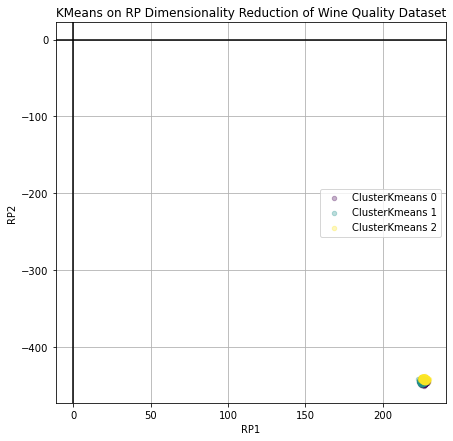

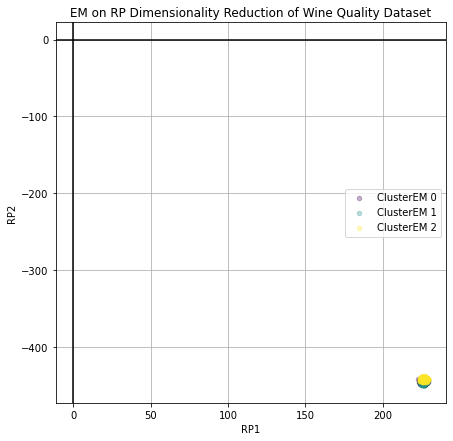

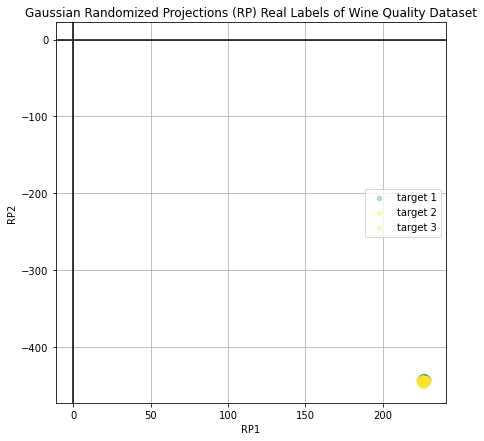

In [510]:
plotData(df_plotKM, 'ClusterKmeans', 'RP1', 'RP2', 
         'KMeans on RP Dimensionality Reduction of Wine Quality Dataset')
plotData(df_plotEM, 'ClusterEM', 'RP1', 'RP2', 
         'EM on RP Dimensionality Reduction of Wine Quality Dataset')
plotData(df_plotKM, 'target', 'RP1', 'RP2', 
         'Gaussian Randomized Projections (RP) Real Labels of Wine Quality Dataset')

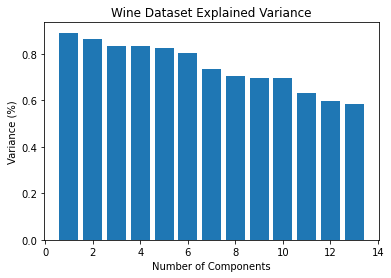

Text(0.5, 1.0, 'Wine quality Factor Analysis eigen values')

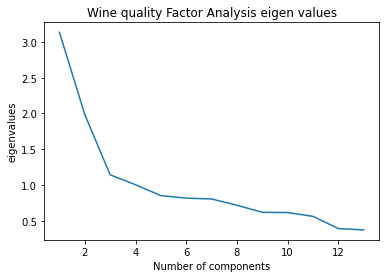

In [671]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size = 0.2)
#Reducing the dimensions with optimal number of components
fa_new = FactorAnalysis(n_components = 13, max_iter = 100)
fa_new.fit(X_train)
X_train_transformed = fa_new.transform(X_train)
X_test_transformed = fa_new.transform(X_test)
x=range(1,14,1)
plt.figure()
plt.bar(x,sorted(fa_new.noise_variance_,reverse = True))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Wine Dataset Explained Variance')
plt.show()
fa_new.components_

!pip install factor_analyzer  

from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(X_train, 10)
#Get Eigen values 
ev, v = fa.get_eigenvalues()
ev
plt.plot(x,ev)
plt.xlabel('Number of components')
plt.ylabel('eigenvalues')
plt.title('Wine quality Factor Analysis eigen values')

In [629]:

fa_new = FactorAnalysis(n_components = 6, max_iter = 500, random_state=22)
start = timer()
fa_new.fit(X1)
X_fa= fa_new.transform(X1)

end = timer()
print("Time for fit: ", end - start)



Time for fit:  0.929043800017098


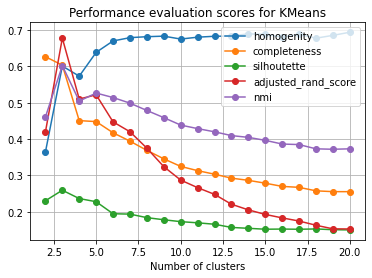

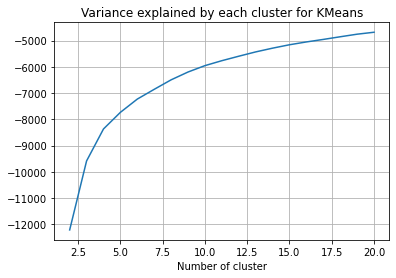

In [670]:
array_homo =[]
array_comp = []
array_sil = []
array_var = []
array_accuracy=[]
cost =[]
array_adj =[]
array_nmi=[]

component_list = range(2, 21,1)
for num_classes in component_list:

    
    
    clf = KMeans(n_clusters= num_classes, init='k-means++',n_init=50, max_iter=300, random_state=20)
    
    clf.fit(X_fa)
    y_test_pred = clf.predict(X_fa)
    #Homogenity score on the test data
    homo = metrics.homogeneity_score(Y1, y_test_pred)
    array_homo.append(homo)
    
    #Completeness score
    comp = metrics.completeness_score(Y1, y_test_pred)
    array_comp.append(comp)
    
 #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(Y1, y_test_pred)
    array_adj.append(adj_score)
    
    nmi_score=normalized_mutual_info_score(Y1, y_test_pred)
    array_nmi.append(nmi_score)
      
    #Silhoutette score
    sil = metrics.silhouette_score(X_fa, y_test_pred, metric='euclidean')
    array_sil.append(sil)

    #Variance explained by the cluster
    var = clf.score(X_fa)
    array_var.append(var)
    
    cost.append(clf.inertia_) 
    
    

#Generating plots
fig4,ax4 = plt.subplots()
plt.grid(True)
ax4.plot(component_list, array_homo,"-o")
ax4.plot(component_list, array_comp,"-o")
ax4.plot(component_list, array_sil,"-o")
ax4.plot(component_list, array_adj,"-o")
ax4.plot(component_list, array_nmi,"-o")
#ax4.plot(component_list, array_accuracy,"-o")

plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for KMeans')


fig5, ax5 = plt.subplots()
ax5.plot(component_list, array_var)
plt.title('Variance explained by each cluster for KMeans')
plt.xlabel('Number of cluster')
plt.grid(True)
plt.show()



0.2082
0.0846
0.6838
0.3252
0.5168
0.0216
0.0682
0.0852
0.1084
0.1766
0.072
0.122
0.1666
0.1606
0.0782
0.136
0.167
0.0464
0.0208


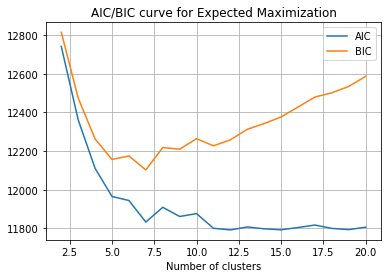

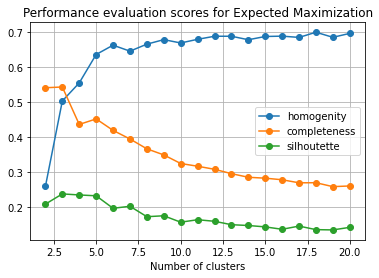

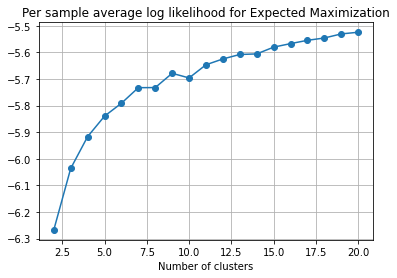

In [666]:
array_aic = []
array_bic = []
array_homo =[]
array_comp = []
array_sil = []
array_avg_log = []
array_accuracy=[]

component_list = range(2, 21,1)
for num_classes in component_list:

    clf = GaussianMixture(n_components=num_classes,covariance_type='spherical', max_iter=300, init_params= 'kmeans')
    #clf = KMeans(n_clusters= num_classes, init='k-means++')
    clf.fit(X_fa)

    y_test_pred = clf.predict(X_fa)
    #Per sample average log likelihood
    avg_log = clf.score(X_fa)
    array_avg_log.append(avg_log)

    #AIC on the test data
    aic = clf.aic(X_test_transformed)
    array_aic.append(aic)

    #BIC on the test data
    bic = clf.bic(X_test_transformed)
    array_bic.append(bic)
    
    acc_score=metrics.accuracy_score(Y1, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)

    #Homogenity score on the test data
    homo = metrics.homogeneity_score(Y1, y_test_pred)
    array_homo.append(homo)

    #Completeness score
    comp = metrics.completeness_score(Y1, y_test_pred)
    array_comp.append(comp)

    #Silhoutette score
    sil = metrics.silhouette_score(X_fa, y_test_pred, metric='euclidean')
    array_sil.append(sil)

#Generating plots

fig1,ax1 = plt.subplots()
ax1.plot(component_list, array_aic)
ax1.plot(component_list, array_bic)
plt.legend(['AIC', 'BIC'])
plt.xlabel('Number of clusters')
plt.title('AIC/BIC curve for Expected Maximization')
plt.grid(True)
fig2,ax2 = plt.subplots()
ax2.plot(component_list, array_homo,"-o")
ax2.plot(component_list, array_comp,"-o")
ax2.plot(component_list, array_sil,"-o")
plt.legend(['homogenity','completeness','silhoutette'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for Expected Maximization')
plt.grid(True)

fig3, ax3 = plt.subplots()
ax3.plot(component_list, array_avg_log,"-o")
plt.xlabel('Number of clusters')
plt.title('Per sample average log likelihood for Expected Maximization')
plt.grid(True)

plt.show()

In [ ]:
# Adapted from https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greys):
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.tight_layout()
    
    return plt

In [521]:
# Plot learning curves
# Adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.close()
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")

Time for fit:  0.4654366000031587
Accuracy Test Score:  0.907
Accuracy Train Score: 0.9315
Cross Value: 0.92 (+/- 0.02)
----
----
RMSE: 0.141
----
Confusion Matrix : 
[[295  14  10]
 [ 21 359  14]
 [  6  28 253]]
f1 score 0.907


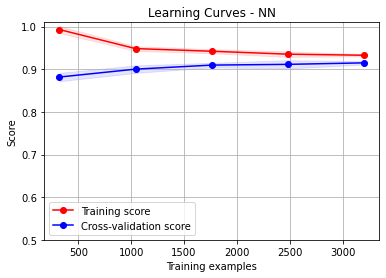

In [661]:
X = data.drop(['quality'], axis=1)
scaler = preprocessing.StandardScaler()
# transform data
X1 = scaler.fit_transform(X)
plt.show()
y=data['quality']
Y1 = y.astype(int)

Y1=data['quality']
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=1)

# Best Params from Assignment 1
clf_nn_tuned = MLPClassifier(activation='relu', max_iter=300, learning_rate_init=.1,hidden_layer_sizes=(8,4))
start = timer()
clf_nn_tuned.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

y_pred = clf_nn_tuned.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = clf_nn_tuned.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(ann, X_train, y_train, cv=5)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
#print('Precision Score : ' + str(precision_score(y_test,y_pred)))
#print('Recall Score : ' + str(recall_score(y_test,y_pred)))
#print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(metrics.confusion_matrix(y_test,y_pred)))
print("f1 score",metrics.f1_score(y_test, y_pred,average='micro'))
title = "Learning Curves - NN"
plot_learning_curve(ann, title, X_train, y_train, ylim=(0.5, 1.01),  n_jobs=-1)
plt.grid()

In [529]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred))
#print("f1 score :",metrics.f1_score(y_test, y_pred_nn_tuned))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred,average='weighted'))

Accuracy score: 0.909
f1 score Micro: 0.909
f1 score Macro: 0.9088242330613555
f1 score Weighted: 0.909161233700774


Time for fit:  0.3254136000177823
Accuracy Test Score:  0.914
Accuracy Train Score: 0.92225
Cross Value: 0.91 (+/- 0.02)
----
----
RMSE: 0.122
----
Confusion Matrix : 
[[265  14   6]
 [ 20 388  22]
 [  6  18 261]]
f1 score 0.914


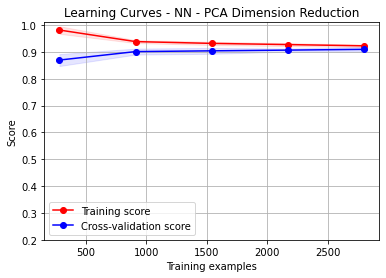

In [660]:
# Build Training and Testing Set PCA
y_train=Y1
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y1, test_size=0.2, random_state=20)

# Best Params from Assignment 1
ann = MLPClassifier(activation='relu', max_iter=300, learning_rate_init=.1,hidden_layer_sizes=(8,4))

start = timer()
ann.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

y_pred = ann.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = ann.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(ann, X_train, y_train, cv=5)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
#print('Precision Score : ' + str(precision_score(y_test,y_pred)))
#print('Recall Score : ' + str(recall_score(y_test,y_pred)))
#print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(metrics.confusion_matrix(y_test,y_pred)))
print("f1 score",metrics.f1_score(y_test, y_pred,average='micro'))
title = "Learning Curves - NN - PCA Dimension Reduction"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1)
plot_learning_curve(ann, title, X_train, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=-1)
plt.grid()

Time for fit:  0.5668942999909632
Accuracy Test Score:  0.91
Accuracy Train Score: 0.91225
Cross Value: 0.78 (+/- 0.36)
----
----
RMSE: 0.123
----
Confusion Matrix : 
[[246  31   8]
 [ 10 407  13]
 [  3  25 257]]
f1 score 0.91


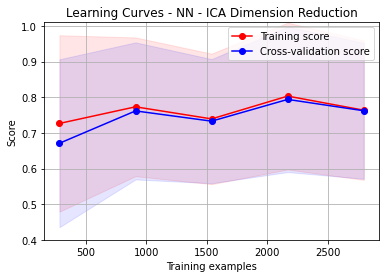

In [659]:
y_train=Y1
# Build Training and Testing Set PCA
X_train, X_test, y_train, y_test = train_test_split(X_ica, y_train, test_size=0.2, random_state=20)

# Best Params from Assignment 1
ann = MLPClassifier(activation='relu', max_iter=400, learning_rate_init=.1,hidden_layer_sizes=(8,4))

start = timer()
ann.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

y_pred = ann.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = ann.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(ann, X_test, y_test, cv=5)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
#print('Precision Score : ' + str(precision_score(y_test,y_pred)))
#print('Recall Score : ' + str(recall_score(y_test,y_pred)))
#print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(metrics.confusion_matrix(y_test,y_pred)))
print("f1 score",metrics.f1_score(y_test, y_pred,average='micro'))
title = "Learning Curves - NN - ICA Dimension Reduction"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1)
plot_learning_curve(ann, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=-1)
plt.grid()

Time for fit:  0.15142020001076162
Accuracy Test Score:  0.865
Accuracy Train Score: 0.88875
Cross Value: 0.84 (+/- 0.08)
----
----
RMSE: 0.183
----
Confusion Matrix : 
[[284  25  12]
 [ 33 355  25]
 [  4  36 226]]


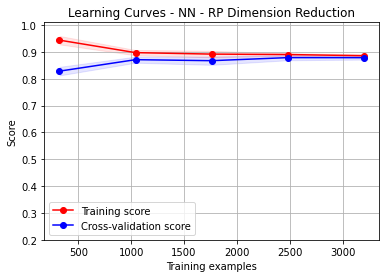

In [557]:
y_train=Y1
# Build Training and Testing Set PCA
X_train, X_test, y_train, y_test = train_test_split(X_rp, y_train, test_size=0.2, random_state=random_state)

# Best Params from Assignment 1
ann = MLPClassifier(activation='relu', max_iter=400, learning_rate_init=.1,hidden_layer_sizes=(8,4))

start = timer()
ann.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

y_pred = ann.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = ann.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(ann, X_test, y_test, cv=5)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
#print('Precision Score : ' + str(precision_score(y_test,y_pred)))
#print('Recall Score : ' + str(recall_score(y_test,y_pred)))
#print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(metrics.confusion_matrix(y_test,y_pred)))

title = "Learning Curves - NN - RP Dimension Reduction"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
plot_learning_curve(ann, title, X_train, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=-1)
plt.grid()

In [560]:
fa_new = FactorAnalysis(n_components = 6, max_iter = 100)

start = timer()
X_fa=fa_new.fit_transform(X1)
end = timer()
print("Time for fit: ", end - start)


Time for fit:  0.4271047000074759


D:\python\anaconda\envs\ML\lib\site-packages\sklearn\decomposition\_factor_analysis.py:256: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)


Time for fit:  0.4879369999980554
Accuracy Test Score:  0.901
Accuracy Train Score: 0.91575
Cross Value: 0.90 (+/- 0.07)
----
----
RMSE: 0.147
----
Confusion Matrix : 
[[270  38  13]
 [ 16 382  15]
 [  3  14 249]]


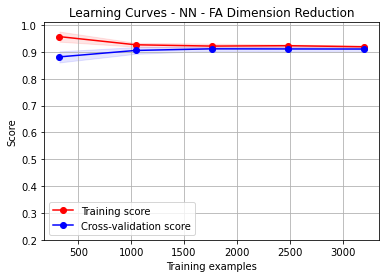

In [561]:
y_train=Y1
# Build Training and Testing Set PCA
X_train, X_test, y_train, y_test = train_test_split(X_fa, y_train, test_size=0.2, random_state=random_state)

# Best Params from Assignment 1
ann = MLPClassifier(activation='relu', max_iter=400, learning_rate_init=.1,hidden_layer_sizes=(8,4))

start = timer()
ann.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

y_pred = ann.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = ann.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(ann, X_test, y_test, cv=5)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
#print('Precision Score : ' + str(precision_score(y_test,y_pred)))
#print('Recall Score : ' + str(recall_score(y_test,y_pred)))
#print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(metrics.confusion_matrix(y_test,y_pred)))

title = "Learning Curves - NN - FA Dimension Reduction"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
plot_learning_curve(ann, title, X_train, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=-1)
plt.grid()

In [588]:
kmeans = KMeans(n_clusters= 3, init='k-means++',n_init=50, max_iter=1000, random_state=44)

start = timer()
X_kmeans=kmeans.fit_transform(X1)
end = timer()
print("Time for fit: ", end - start)

#X_kmeans = kmeans.transform(X1)
#X_kmeans = pd.DataFrame(X_kmeans_array, columns=['K1','K2','K3','K4','K5','K6','K7','K8'])
#X_kmeans = pd.DataFrame(X_kmeans_array, columns=['K1','K2','K3'])

Time for fit:  0.2994360000011511


Time for fit:  0.38549099999363534
Accuracy Test Score:  0.905
Accuracy Train Score: 0.9065
Cross Value: 0.88 (+/- 0.08)
----
----
RMSE: 0.161
----
Confusion Matrix : 
[[258  12  15]
 [ 17 389  24]
 [  7  20 258]]
f1 score 0.905


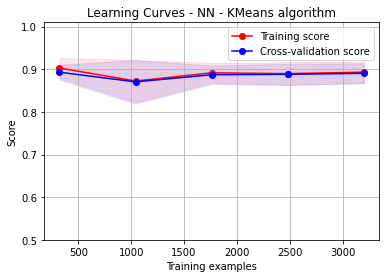

In [662]:
X_train, X_test, y_train, y_test = train_test_split(X_kmeans, Y1, test_size=0.2, random_state=20)

# Best Params from Assignment 1
ann = MLPClassifier(activation='relu', max_iter=400, learning_rate_init=.1,hidden_layer_sizes=(8,4),random_state=10)

start = timer()
ann.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

y_pred = ann.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = ann.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(ann, X_test, y_test, cv=5)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
#print('Precision Score : ' + str(precision_score(y_test,y_pred)))
#print('Recall Score : ' + str(recall_score(y_test,y_pred)))
#print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(metrics.confusion_matrix(y_test,y_pred)))
print("f1 score",metrics.f1_score(y_test, y_pred,average='micro'))
title = "Learning Curves - NN - KMeans algorithm"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
plot_learning_curve(ann, title, X_train, y_train, ylim=(0.5, 1.01), cv=cv, n_jobs=-1)
plt.grid()

In [663]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=20)

start = timer()
gmm.fit(X1)
end = timer()
print("Time for fit: ", end - start)

X_gmm = gmm.predict_proba(X1)
#X_gmm = pd.DataFrame(X_gmm_array, columns=['G1','G2','G3','G4','G5','G6','G7','G8'])

Time for fit:  0.07249789999332279


Time for fit:  0.3505150999990292
Accuracy Test Score:  0.888
Accuracy Train Score: 0.89175
Cross Value: 0.89 (+/- 0.03)
----
----
RMSE: 0.151
----
Confusion Matrix : 
[[251  23  11]
 [ 18 378  34]
 [  2  24 259]]
f1 score 0.888


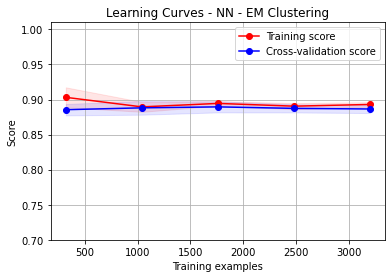

In [664]:
# Build Training and Testing Set PCA
X_train, X_test, y_train, y_test = train_test_split(X_gmm, Y1, test_size=0.2, random_state=20)

# Best Params from Assignment 1
ann = MLPClassifier(activation='tanh', max_iter=300, learning_rate_init=.1,hidden_layer_sizes=(8,4),random_state=10)

start = timer()
ann.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

y_pred = ann.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = ann.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(ann, X_test, y_test, cv=5)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
#print('Precision Score : ' + str(precision_score(y_test,y_pred)))
#print('Recall Score : ' + str(recall_score(y_test,y_pred)))
#print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(metrics.confusion_matrix(y_test,y_pred)))
print("f1 score",metrics.f1_score(y_test, y_pred,average='micro'))
title = "Learning Curves - NN - EM Clustering"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
plot_learning_curve(ann, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.grid()